# Maximizing NYC Cab Profits (2015-09)


### NOTE: 

The presentation attached works as a well-documented summary of the entire analysis. The code is the entire analysis and holds explanations for each working. 

Please go through the presentation first for the key points and the larger perspective.

In [2]:
#ensuring warnings are not highlighted - (for better presentation)
import warnings
warnings.simplefilter('ignore')

In [356]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold as SKF
import statsmodels.stats as stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
from math import radians, cos, sin, asin, sqrt

# 1

###  A) Programmatically downloading and loading the trip data for September 2015

In [199]:
#loading the data
data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv') 

In [200]:
backup_data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv') 

In [198]:
data = pd.backup_data.copy

### B) Number of rows and columns in the data that was loaded

In [181]:
print('Number of rows:',data.shape[0]) 
print('Number of columns:',data.shape[1]) 

Number of rows: 1494926
Number of columns: 21


# Understanding the Data and Data Cleaning

**Intent:** Before going ahead with question 2, I am simply going to look at the data to better understand it and later clean it for the analysis.

In [190]:
#Looking at the first 10 rows - all columns
pd.set_option('display.max_columns', None)
data.head(10) 

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1,1.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,0.3,7.80,1,1.0
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,0.90,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,1.33,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1,1.0
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,0.84,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
improvement_surcharge    1494926 non-null float64
Total_amount             1494926 non-null floa

**Observation:** I noticed a blank at the end of Trip type column name, therefore will be renaming it without the blank.

In [183]:
#renaming column without the blank at the end.
data = data.rename(columns={'Trip_type ': 'Trip_type'})

In [201]:
#Summary Statistic of numeric Columns
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,1494926.0,1.782045,0.412857,1.000000,2.000000,2.000000,2.000000,2.000000
RateCodeID,1494926.0,1.097653,0.635944,1.000000,1.000000,1.000000,1.000000,99.000000
Pickup_longitude,1494926.0,-73.830839,2.776082,-83.319077,-73.959610,-73.945358,-73.917480,0.000000
Pickup_latitude,1494926.0,40.691144,1.530882,0.000000,40.698952,40.746738,40.802551,43.177261
Dropoff_longitude,1494926.0,-73.837278,2.677911,-83.427841,-73.967819,-73.945038,-73.910133,0.000000
Dropoff_latitude,1494926.0,40.692905,1.476698,0.000000,40.698776,40.747284,40.790146,42.799343
Passenger_count,1494926.0,1.370598,1.039426,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,1494926.0,2.968141,3.076621,0.000000,1.100000,1.980000,3.740000,603.100000
Fare_amount,1494926.0,12.543198,10.082781,-475.000000,6.500000,9.500000,15.500000,580.500000
Extra,1494926.0,0.351280,0.366310,-1.000000,0.000000,0.500000,0.500000,12.000000


**Initial Impressions looking at the Summary:** 
 
1) Ehail_fee is entirely missing. (Let's drop it) <br>
2) The other variables do not have missing values.<br>
3) The minimum for passenger counts is 0. That is strange since ideally the passenger count should atleast be one. Let's look at these records and the count.<br>
4) The trip distance is 0 for some obervations. The max value is a clear outlier. This might affect the histogram plot and we might have to remove it for the plot. Let's later look at these cases too.<br>
5) The Fare amount has a minimum of -475, which is likely to be a data issue. The max is 580 seems to be an outlier.<br>
6) Few negative values are present for the rest of the variables. <br>
7) Rate code id has a max of 99. This values is definitely not possible since it's categorical.

**Note:** Passenger_count, Trip Distance, Fare amount, Extra, MTA_tax, Tip_amount, Tolls_amount, improvement_surcharge and Total_amount all have negative values. They are all likely to be a data error or incomplete data entry and should be ideally dropped. But let's look at it once, before doing so.

In [202]:
#Dropping column Ehail_fee
data = data.drop(['Ehail_fee'], axis=1)

In [125]:
#Going through a few cases for passenger count equal to zero
print("Number of rows which have passenger count equal to zero are",data[data.Passenger_count==0].shape[0])
data[data.Passenger_count==0].head(5)

Number of rows which have passenger count equal to zero are 440


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
1097,1,2015-09-01 00:44:17,2015-09-01 00:51:18,N,5,-73.921661,40.706581,-73.895645,40.703232,0,1.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0
2129,1,2015-09-01 01:07:25,2015-09-01 01:27:51,N,5,-73.931175,40.702847,-74.017197,40.642117,0,9.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0
2551,2,2015-09-01 02:21:00,2015-09-01 02:33:33,N,5,-73.953094,40.680672,-73.897552,40.677704,0,3.52,20.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0
5572,1,2015-09-01 07:52:57,2015-09-01 08:05:09,N,5,-73.925659,40.838451,-73.923317,40.816864,0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0
10310,1,2015-09-01 09:04:28,2015-09-01 09:08:16,N,5,-73.948143,40.837135,-73.942070,40.842621,0,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0


**Obervation:** Looking at about a 100 rows (just 5 shown here), the Rate code ID is populated as 5 for all cases. Lets just take a frequency count for the Rate ID for cases where paasenger count = 0.

In [126]:
#Frequency Count - Rate ID when passenger count equal to zero
print("Frequency Count when Passenger_count = 0\n")
print(data[data.Passenger_count==0].RateCodeID.value_counts())

Frequency Count when Passenger_count = 0

5     432
99      4
3       3
2       1
Name: RateCodeID, dtype: int64


**Obervation:** As expected, most cases have rate id = 5, which are negotiated rates. For an unknown reason, when the rates are negotiated, there is a small percentage of these cases to have passenger count to be 0. Also, quite a few of them have trip distances and fare amounts to be zero as well.

In [127]:
print("Number of rows which have trip distance equal to zero are",data[data.Trip_distance==0].shape[0])
data[data.Trip_distance==0].head(5)

Number of rows which have trip distance equal to zero are 20592


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.0,7.8,0.0,0.0,1.95,0.0,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.0,45.0,0.0,0.0,0.00,0.0,0.0,45.00,1,2.0
28,2,2015-09-01 00:06:37,2015-09-01 00:09:37,N,1,-73.948479,40.813862,-73.941071,40.818840,1,0.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2,1.0
31,2,2015-09-01 00:07:12,2015-09-01 00:07:27,N,2,-73.844269,40.755165,-73.844650,40.755058,1,0.0,52.0,0.0,0.5,0.00,0.0,0.3,52.80,2,1.0
44,2,2015-09-01 00:12:26,2015-09-01 00:12:34,N,5,-73.873322,40.840176,-73.873306,40.840187,1,0.0,9.0,0.0,0.0,0.00,0.0,0.0,9.00,1,2.0


**Obervation:** Looking at about a 100 rows (just 5 shown here), apart from the trip distance, the rest of the values seem alright. The trip distance in all probability is simply a reporting error by the meters.  But to ensure these cases do not bias later calculations (such as mean trip distance grouped by hour), lets drop these cases.  Thats about 1.38% of the total cases.

**Note:** I researched on the minimum initial fare amount for the green taxis. It is 2.5 dollars since 2005. <br> 
(Source used: http://nymag.com/nymetro/urban/features/taxi/n_20286/)

Also, the counts of trips where Extra, MTA_tax, Tip_amount, Tolls_amount, improvement_surcharge are lower than 0 are relatively low. We are simply going to remove these cases, assuming them to be data error.

RateCodeID = 99 is not plausible. We are going to remove these cases too.

In [204]:
data_cleaned = data[ (data.Passenger_count > 0) & (data.Trip_distance >0) &
            (data.Extra >= 0) 
            & (data.MTA_tax >= 0) & (data.Tip_amount >= 0) 
            & (data.Tolls_amount >= 0) &  (data.improvement_surcharge >= 0)
            & (data.Fare_amount >= 2.5) & (data.RateCodeID<=6)]

In [205]:
data.shape[0]-data_cleaned.shape[0]

26517

**Erroneous Value Treatment:** the drop in number of rows accounts for 1.77% of all trips. This error rate in the data is expected and acceptable. Let's go ahead with the other questions

**Outlier Treatment:** There are few clear outliers in the data. We are not going to remove them from the dataset since the values still look plausible.  We might still remove them from the histogram plots for better viewing.

# 2

 ### Histogram of the number of the trip distance

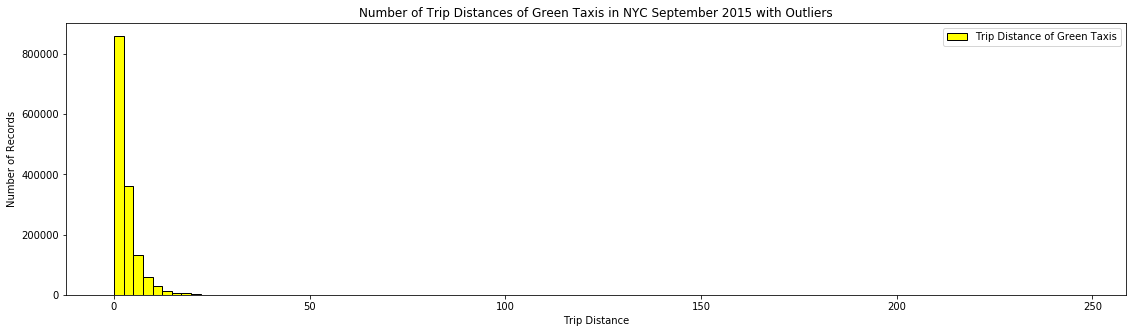

In [138]:
#Set figure size
plt.figure(figsize=(19,5)) 
#Plot histogram of all trip distance data
plt.hist(data_cleaned.Trip_distance,bins = 100,label = 'Trip Distance of Green Taxis',color = "yellow",edgecolor='black') 
#Set x label
plt.xlabel('Trip Distance') 
#Set y label
plt.ylabel('Number of Records') 
#Set title
plt.title('Number of Trip Distances of Green Taxis in NYC September 2015 with Outliers') 
#Show legend
plt.legend() 
plt.show()

**Observation:** As earlier mentioned, trip distances does have few outliers. Hence, to better view the histogram we need to remove outliers.
For this excercise I have defined outliers as those that are three standard deviations away from the mean.

In [207]:
#Calculate the mean of trip distances
mean = data_cleaned.Trip_distance.mean() 
#Calculate the standard deviation of trip distances
std = data_cleaned.Trip_distance.std() 
#Define a new dataset without outliers that are 3 std away from mean
data_cleaned_outlier_removed = data_cleaned.Trip_distance[abs(data_cleaned.Trip_distance-mean)/std <= 3] 

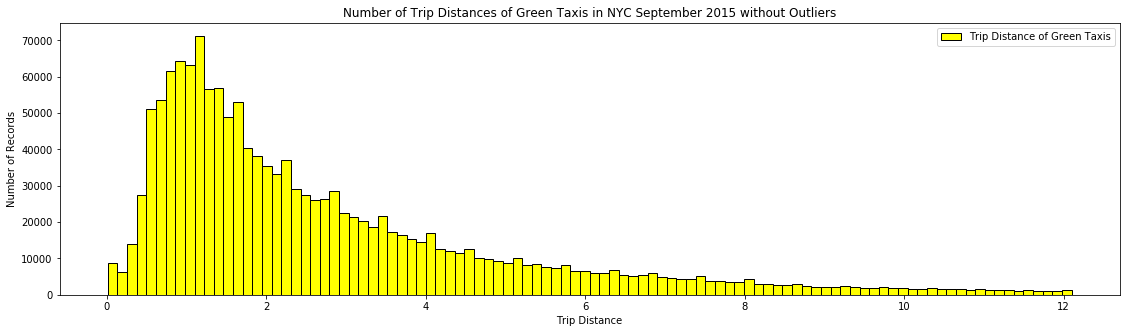

In [208]:
#Set figure size
plt.figure(figsize=(19,5)) 
#Plot histogram of trip distance data without outliers
plt.hist(data_cleaned_outlier_removed,bins = 100,label = 'Trip Distance of Green Taxis', color = "yellow",edgecolor='black') 
#Set x label
plt.xlabel('Trip Distance') 
#Set y label
plt.ylabel('Number of Records') 
#Set title
plt.title('Number of Trip Distances of Green Taxis in NYC September 2015 without Outliers') 
#Show legend
plt.legend() 
plt.show()

**Observations on the Structure:**

1) Right-skew (median smaller than its mean). <br>
2) The highest frequency of Trip distances occur at about 1.6 miles. <br>
3) Gradual decrease in frequency after 1.6 miles.

**The hypothesis:**

People definitely prefer short distances over long distances. That's probably because of two reasons: Longer distances are extremely expensive. NY subway or driving their own car would be much cheaper. Secondly, longer distances could also mean increased traffic and longer trip times. NY subway would be a faster means of transport.

# 3

### A) Mean and median trip distance grouped by hour of day

**Note:** I have first converted the pickup time to datetime format and later extracted the hour. (The hour has a 24-hour format)

In [215]:
#converting lpep_pickup_datetime to datatime format
data_cleaned['pickup_in_datetime'] = pd.to_datetime(data_cleaned.lpep_pickup_datetime) 
#Extracting the hour from the pickup time
data_cleaned['pickup_hour'] = data_cleaned.pickup_in_datetime.dt.hour

In [236]:
#mean trip distance grouped by hour of day
mean = data_cleaned.Trip_distance.groupby(by = data_cleaned.pickup_hour).mean() 
#median trip distance grouped by hour of day
median = data_cleaned.Trip_distance.groupby(by = data_cleaned.pickup_hour).median() 
#Combine mean and median of each hour of day into one dataframe
trip_dist_grouped_by_hr = pd.concat([mean.rename('Mean'),median.rename('Median')],axis =1,)
#Naming the Index
trip_dist_grouped_by_hr.index.names = ['Hour of day']
#Output
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(trip_dist_grouped_by_hr.transpose())

Hour of day        0         1         2         3         4         5   \
Mean         3.153629  3.057664  3.095108  3.242885  3.586502  4.214788   
Median       2.240000  2.170000  2.200000  2.260000  2.400000  2.990000   

Hour of day        6         7         8         9         10        11  \
Mean         4.138277  3.333136  3.086094  3.045181  2.992243  2.961964   
Median       2.900000  2.200000  2.000000  2.000000  1.970000  1.900000   

Hour of day        12        13        14        15        16        17  \
Mean         2.953562  2.930205  2.915833  2.905997  2.824535  2.715658   
Median       1.910000  1.900000  1.870000  1.860000  1.830000  1.800000   

Hour of day        18      19        20       21        22        23  
Mean         2.688385  2.7475  2.811842  3.03466  3.224255  3.230237  
Median       1.810000  1.8800  1.930000  2.07000  2.220000  2.260000  


To better observe the trend, let's plot the data:

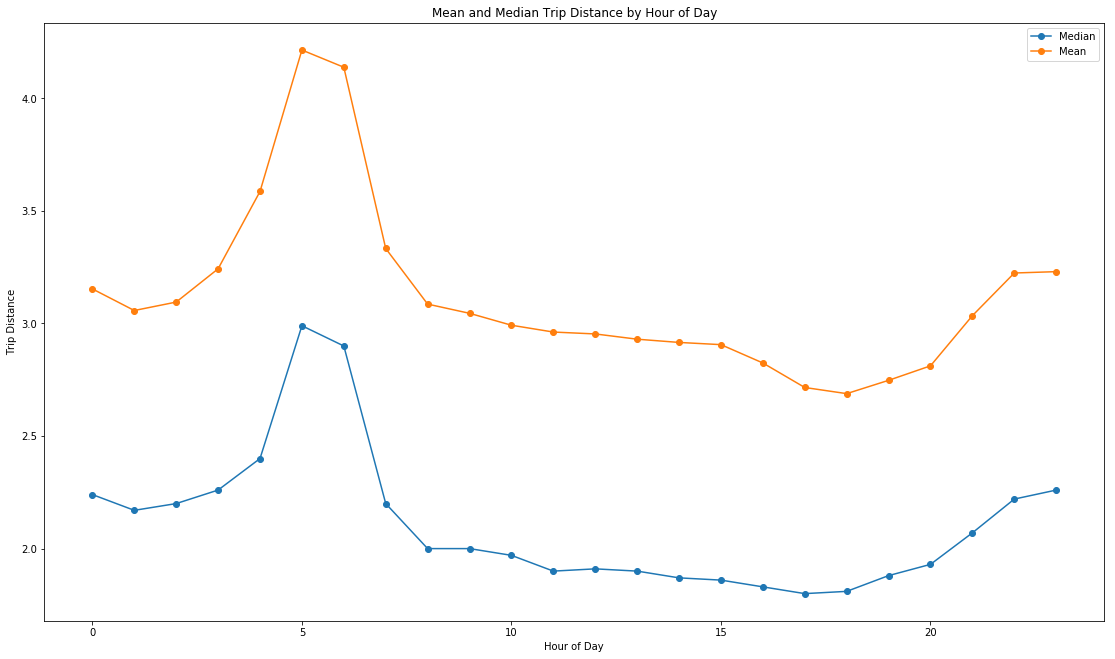

In [239]:
plt.figure(figsize= (19,11))
#Plot median trip distance by hour of day
plt.plot(trip_dist_grouped_by_hr.Median, marker='o', label = 'Median')
#Plot mean trip distance by hour of day
plt.plot(trip_dist_grouped_by_hr.Mean, marker='o', label = 'Mean')
#Set x label
plt.xlabel('Hour of Day')
#Set y label
plt.ylabel('Trip Distance')
#Set title
plt.title('Mean and Median Trip Distance by Hour of Day')
#Show legend
plt.legend()
plt.show()

**Obervation:** 
The longest rides are taken early in the morning. Evenings have comparatively longer rides too. Hours between 9 and 7 have short rides taken. 

**My hypothesis:** <br>
1) People take cabs to work to ensure they reach on time. Also, they take cab back home when it's really late. <br>
2) People do not take cab back home from work, if they leave on time. Since probably there is no urgency of reaching on time, they take the subway or other form of public transport.

### B) Trips that originate or terminate at one of the NYC area airports

**Note:** As per the data dictionary, RateCodeID=2 and RateCodeID=3 indicate trips from or to JFK and Newark. The objective is to first calculate the total trips and average fare for these trips.

In [285]:
#A data set that has trips which originate or terminate at one of the NYC area airports
NYC_airports = data_cleaned[(data_cleaned.RateCodeID == 2)|(data_cleaned.RateCodeID == 3)]

#number of transactions that originated or terminated at one of the NYC area airports
print('\nNumber of airport transactions:',NYC_airports.shape[0])

#Average fare for trips that originated or terminated at one of the NYC area airports
print('\nAverage fare for trips that originated or terminated at one of the NYC area airports:',
      '{:.2f}'.format(NYC_airports.Fare_amount.mean()))

#Average total fare (including tips and other charges) for trips that originated or terminated at one of the NYC area airports
print('\nAverage total fare (incl. tips & other charges) for trips that originated or terminated at NYC area airports:',
      '{:.2f}'.format(NYC_airports.Total_amount.mean()))


Number of airport transactions: 4276

Average fare for trips that originated or terminated at one of the NYC area airports: 53.24

Average total fare (incl. tips & other charges) for trips that originated or terminated at NYC area airports: 63.47


**Additional Analysis:**

In [293]:
#Number of trips to/from the airports as a proportion of total green taxi trips
print("\nPercentage of rides to/from NYYC airports of total ride:",'{:.3f}'.
      format(NYC_airports.shape[0]/data_cleaned.shape[0]*100),"%")

#Frequency distribution for rate code ids
print("\nFrequency distribution of rides from JFK and Newark respectively:")
print(NYC_airports.RateCodeID.value_counts())
print("\nPercetange of rides from/to JFK of total airport rides: ",'{:.3f}'.
      format(NYC_airports[NYC_airports.RateCodeID==2].shape[0]/
             NYC_airports[(NYC_airports.RateCodeID == 2)|(NYC_airports.RateCodeID == 3)].shape[0]*100),"%")

#printing top 5 fare amounts for airport trips
print("\nTop 5 fare amounts:")
print(NYC_airports.Fare_amount.value_counts().head(5))

#average fare amount for non airport trips
non_NYC_airports = data_cleaned[(data_cleaned.RateCodeID != 2) & (data_cleaned.RateCodeID != 3)]
print("\nAverage Fare amount for non airport trips:",
      '{:.2f}'.format(non_NYC_airports.Fare_amount.mean()))


Percentage of rides to/from NYYC airports of total ride: 0.291 %

Frequency distribution of rides from JFK and Newark respectively:
2    3413
3     863
Name: RateCodeID, dtype: int64

Percetange of rides from/to JFK of total airport rides:  79.818 %

Top 5 fare amounts:
52.0    3414
20.0     181
20.5      27
87.0      15
81.5      13
Name: Fare_amount, dtype: int64

Average Fare amount for non airport trips: 12.47


**Observations:**

1) **Only 0.3% of total trips account for trips to/from the airports. That's simply 4276 trips.**  <br>
2) 80% rides are from JFK, while the remaining 20% is accounted by Newark <br>
3) Fare amount = 52 is the most frequently applied rate. It accounts for 80% of the all fare amounts (airport trips only). <br>
4) The average fare amounts for non-airport trips are very low in comparision. This was expected. The airports are located far from the city.

**Recommendation:**

As per THE PORT AUTHORITY OF NY & NJ's monthly summary (DEC 2015), There are about 4.7 Million Passengers that travelled. As per the report about 890,000 passengers used Airport Coach(Bus), Taxis and Air Trains. The taxis dispatched were 202,000 approx.

Now, Assuming the numbers for September 2015 are 80% that of Dec 2015 (Since Dec is a high travel season usually). The numbers would now be: 3.76 total passengers. 708,000 passengers used  Airport Coach(Bus), Taxis and Air Trains. The taxis dispatched were 161,000.

One needs to account for Ubers,Lyfts and other ride hailing companies too which is not stated in the report. As per https://www.businessinsider.com/uber-taxis-new-york-ridership-2017-10, these companies account for about 84% market share in 2015. Using the same market share numbers, if 161,000 taxis dispatched accounted for 16% market share, 84% accounts to 1.01 Million rides.

Of the total taxis dispatched and ride hailing cabs dispatched are about 1.17 million. Assuming only 20% of these travel from/to the green taxis zone, that's still 234K rides. While green taxis account for only 4276 rides (1.8%)!

The assumption is green taxis are not so popular, because ride hailing cabs (uber and lyft) are more convinient and cheaper. 

So the **Recommendation** is to slash fare rates for airport trips to tap into this large market segment!!

Source: https://www.panynj.gov/airports/pdf/JFK_Dec_2015.pdf

# 4

### A) Derived variable for tip as a percentage of the total fare

In [298]:
#Derived variable for tip as a percentage of tha total fare
data_cleaned['Tip_percentage'] = data_cleaned.Tip_amount/data_cleaned.Total_amount

### B) Predictive model for tip as a percentage of the total fare - Random Forest Regression

**Note:** Before building the model, lets clean the data, do an EDA, onehotencode categorical variables and also split the data into training and test.

**I) DATA CLEANING** Done earlier.

**II) EDA** We have already done a decriptive analysis earlier. <br>
Let's now look at the correlation between Tip percentage and other variables.

In [340]:
corr = data_cleaned.corr()
corr

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_hour,Tip_percentage
VendorID,1.000000,0.008884,-0.033425,0.036620,-0.012027,0.015148,0.082393,0.004608,0.004397,0.009418,-0.007059,-0.008728,0.006860,-0.000922,0.002825,-0.029407,0.008528,0.014654,-0.008067
RateCodeID,0.008884,1.000000,0.023601,-0.016556,0.006256,0.001445,0.001655,0.095578,0.137939,-0.124283,-0.960304,-0.005827,0.050729,-0.936668,0.109447,0.048042,0.952888,-0.017438,-0.067733
Pickup_longitude,-0.033425,0.023601,1.000000,-0.998258,0.255753,-0.254648,-0.003206,-0.003823,0.001565,-0.003681,-0.023300,-0.002673,-0.001965,-0.023916,0.000310,0.002019,0.023664,-0.003781,-0.004642
Pickup_latitude,0.036620,-0.016556,-0.998258,1.000000,-0.254832,0.257055,0.001809,0.001510,-0.004991,0.000147,0.016676,-0.004588,0.004508,0.017368,-0.004745,0.006322,-0.016907,0.003057,-0.005298
Dropoff_longitude,-0.012027,0.006256,0.255753,-0.254832,1.000000,-0.997664,-0.000691,0.009194,0.009270,-0.000429,-0.005046,-0.002921,0.001239,-0.000929,0.007467,0.007898,-0.000550,-0.003157,-0.006954
Dropoff_latitude,0.015148,0.001445,-0.254648,0.257055,-0.997664,1.000000,-0.000740,-0.013085,-0.014559,-0.003002,-0.001846,-0.006302,-0.000392,-0.006320,-0.014055,0.002911,0.008019,0.001945,-0.005314
Passenger_count,0.082393,0.001655,-0.003206,0.001809,-0.000691,-0.000740,1.000000,0.011463,0.011335,0.018972,-0.000925,0.004512,0.007573,-0.000471,0.011961,-0.000458,0.001002,0.009491,0.001348
Trip_distance,0.004608,0.095578,-0.003823,0.001510,0.009194,-0.013085,0.011463,1.000000,0.916961,-0.046911,-0.072051,0.429407,0.328919,-0.053458,0.905925,-0.144294,0.054097,-0.035322,0.099463
Fare_amount,0.004397,0.137939,0.001565,-0.004991,0.009270,-0.014559,0.011335,0.916961,1.000000,-0.058423,-0.109394,0.441769,0.305674,-0.085709,0.977737,-0.147931,0.086957,-0.020148,0.096146
Extra,0.009418,-0.124283,-0.003681,0.000147,-0.000429,-0.003002,0.018972,-0.046911,-0.058423,1.000000,0.118359,-0.009082,-0.034837,0.117432,-0.021087,-0.010152,-0.118749,0.254471,0.011317


**Multi collinaerity check:**
RateCodeID has a correlation of -0.93, -0.95, -0.96 with improvement_surcharge, Trip_type and MTA Tax. While Pickup latitude and longitude have extremely high correlation too. Similary drop lat has almost a perfect correlation with drop long. Fare amount and Total Amount have a high correlation too.

For a linear regression model, this could be serious problem. So we would simply keep RateCodeID and Total Amount. I am entirely ignoring the latitude and longitude variables, since they do not seem to have a correaltion with tip percentage anyway. 

The rest of the correlataion values between independent variables seem reasonable,


**Note:**
We can drop vendor ID and Passenger_count	 too since it has no correlation with tip percentage.

Since, the correlation between payment type and Tip percentage seem rather high, let's first check it out.

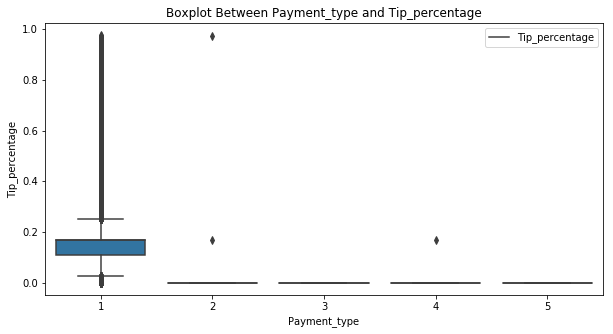

In [339]:
#Set figure size
plt.figure(figsize = (10,5))
#Make a boxplot between Payment_type and Tip_percentage
sns.boxplot(x='Payment_type', y='Tip_percentage', 
            data=data_cleaned).set_title("Boxplot Between Payment_type and Tip_percentage")
#Set legend
plt.legend(['Tip_percentage'])
plt.show()

**Note:** The Tip percentage is higher when Payment type = credit card. But when the payment type is cash, the tip amount is not recorded. Therefore, it would not be possible to predict the tip amount accurately when payment type is cash.


**III) KEEP ONLY REQUIRED FEILDS AND ONE HOT ENCODE CATEGORICAL VARIABLES**

In [388]:
#Make a copy of raw data
X_rf = data_cleaned.copy()

#Create target that is the new variable
y_rf= data_cleaned.Tip_percentage

#keep all variables that were planned to kept in step 2. Categorical variables will added after one hot encoding.            
X_rf_dropped = X_rf[["Trip_distance","Extra","Tip_amount","Tolls_amount","Total_amount","pickup_hour"]]

#Use only the column Tip_percentage as the response variable y
y_rf_dropped = y_rf

In [389]:
#ONE HOT ENCODING

#Build a label encoder
le = preprocessing.LabelEncoder()
#Transform string factors 'Y' and 'N' in Store_and_fwd_flag into number factors
X_rf['fStore_and_fwd_flag'] = le.fit_transform(X_rf['Store_and_fwd_flag'])

#Using one hot encoder on categorical variables
ohe = OneHotEncoder()

dStore_and_fwd_flag = pd.DataFrame(ohe.fit_transform(X_rf.fStore_and_fwd_flag.values.reshape(-1,1)).toarray(), 
                                   columns = ["Store_and_fwd_flag1", "Store_and_fwd_flag2"])

dRateCodeID = pd.DataFrame(ohe.fit_transform(X_rf.RateCodeID.values.reshape(-1,1)).toarray(), columns = ["RateCodeID1", 
                                        "RateCodeID2", "RateCodeID3", "RateCodeID4", "RateCodeID5", "RateCodeID6"])

dPayment_type = pd.DataFrame(ohe.fit_transform(X_rf.Payment_type.values.reshape(-1,1)).toarray(), columns = ["Payment_type1", 
                                        "Payment_type2", "Payment_type3", "Payment_type4", "Payment_type5"])

X_rf_dropped.reset_index(drop=True, inplace=True)

X_rf_dropped = pd.concat([X_rf_dropped, dStore_and_fwd_flag, dRateCodeID, 
                                 dPayment_type], axis = 1)

**IV) TRAINING AND TEST DATA SPLIT**

In [394]:
#Make a copy of the raw data
X = X_rf_dropped.copy()
#Set y as Tip_percentage
y = y_rf_dropped.copy()

#Splite the raw data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

### Random Forest Regression

Lets build our random forest linear regression model. After dropping the required variables that were causing multi-collinearity, the other assumptions of linear regression are successfully satisfied. (Residual plots were good too.)

**Note:** I have not used any interactions to keep the model simple.

In [464]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 5 decision trees
rf = RandomForestRegressor(n_estimators = 3, random_state = 90)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
           oob_score=False, random_state=90, verbose=0, warm_start=False)

In [469]:
#Make Predictions on the Test Set and check error rate

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'degrees.')

Mean Absolute Error: 0.0001 degrees.


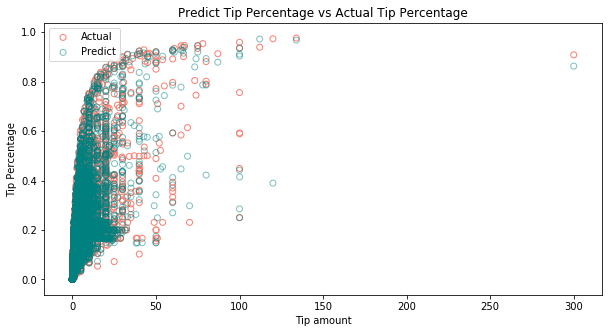

In [468]:
plt.figure(figsize= (10,5))
#Make a scatter plot between predict tip percentage and actual tip percentage
plt.scatter(X_test.Tip_amount.values, y_test, facecolors='none', 
            edgecolors = 'salmon', label = "Actual")
plt.scatter(X_test.Tip_amount.values, predictions, facecolors='none', edgecolors='teal', 
            label = "Predict", alpha = 0.5)
#Set title
plt.title('Predict Tip Percentage vs Actual Tip Percentage')
#Set xlabel
plt.xlabel('Tip amount')
#Set ylabel
plt.ylabel('Tip Percentage')
#Set legend
plt.legend(loc = 2)
plt.show()

**Conclusion:**

The MSE is low, which suggest a good prediction model. The plot between the actual and Predicted values look really good as well.

# 5

### Search - A Function, given a point P, to Find the K Trip Origination Points Nearest P with Time Consideration

Parameters considered: Pick up Location and Time

I planned to use haversine formula to calculate the distance between two lat longs.

Inspiration for using haversine: <br>
https://www.movable-type.co.uk/scripts/latlong.html <br>
https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

### ALGORITHM:

In [317]:
def haversine(lon1, lat1, lon2, lat2):
    '''
    This particular function calculates the great-circle distance (Using the Haversine formula) between 2 points.
    '''
    #Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    #Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    #Radius of earth in kilometers is 6371
    r = 6371
    return r * c

In [307]:
def k_orginating_points(PickupTime_Lat_Lon, Point_P, k, time_constraint):
    '''
    Given a point P, This is a function to Find the K Trip Origination Points Nearest P with Time Consideration.
    
    PickupTime_Lat_Lon：A dataframe with three columns: pick-up time(Timestamp), longtitude(float), latitude(float).
    It contains information for all points we have.
    
    Point_P: A dataframe having similar structure as PickupTime_Lat_Lon but containing information for one point only (Point P).
    
    k: The number of points nearest to Point P.
    
    time_constraint: The time difference between the pick-up time of the customer at point P and pick-up time of 
    other points in minutes. This is setup by the user.
    '''
    #time difference between the given point and other points in minutes
    PickupTime_Lat_Lon['timediff'] = abs(((PickupTime_Lat_Lon.iloc[:,0] - Point_P[0]).astype('timedelta64[s]'))/60)
    
    #removing records where timediff > time_constraint
    PickupTime_Lat_Lon = PickupTime_Lat_Lon[PickupTime_Lat_Lon.timediff < time_constraint]
    
    #Reindexing the new dataframe
    PickupTime_Lat_Lon.reset_index(inplace=True, drop=True)
    
    #Defining an empty list to store distance between P and each other point
    dislist = []
    #for loop to calculate distance between all point and P.
    for i in range(PickupTime_Lat_Lon.shape[0]):
        lon1 = PickupTime_Lat_Lon.iloc[:,1][i]
        lat1 = PickupTime_Lat_Lon.iloc[:,2][i]
        lon2 = Point_P[1]
        lat2 = Point_P[2]
        #Calculate the great circle distance between P and the current point in the loop
        distance = haversine(lon1, lat1, lon2, lat2)
        #Append the distance to the list
        dislist.append(distance)
        
    #Converting the list into dataframe
    disDf = pd.DataFrame(dislist, columns = ['distance'])
    #Combine two dataframes together and sorting as per distance 
    PickupTime_Lat_Lon = pd.concat([PickupTime_Lat_Lon ,disDf], axis =1)
    PickupTime_Lat_Lon = PickupTime_Lat_Lon.sort_values(by='distance')
    
    #Find the k nearest points to P 
    k_nearest = PickupTime_Lat_Lon[0:k]
    #Return the k nearest points and the time taken.
    return k_nearest

### OUTPUT AND SPEED TEST

In [312]:
#Select pick-up time, pick-up longitude and pick-up latitude from the data
data_cleaned['pickup_datetime'] = pd.to_datetime(data_cleaned.lpep_pickup_datetime) 
PickupTime_Lat_Lon = data_cleaned.loc[:, ['pickup_datetime', 'Pickup_longitude', 'Pickup_latitude']]

In [314]:
#Select a random point as point P
Point_P = PickupTime_Lat_Lon.iloc[90]
Point_P

pickup_datetime     2015-09-01 00:09:13
Pickup_longitude               -73.8773
Pickup_latitude                 40.7376
Name: 96, dtype: object

In [315]:
#removing point p from data
PickupTime_Lat_Lon = PickupTime_Lat_Lon.iloc[1:]

In [332]:
# time and output test
# k = 5
# time constraint 10 minutes

import time

t1 = time.time()
k_orginating_points(PickupTime_Lat_Lon, Point_P, 5, 10)
t2 = time.time()

print("Run time: {:.4f}".format(t2-t1)," seconds")

Run time: 0.2420  seconds


**Code Efficiency Observation:** The code seems efficient and takes about a fraction of a second to run on the entire dataset. It shall do well on larger data sets too